<a href="https://colab.research.google.com/github/AdityaJaiswal14/IITM-BDM-CapstoneProject/blob/main/BDM_Project_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Copy of BDM-VENDOR-SHEET - Sheet1 (1).csv')
df

,Order date,Category,QUANTITY( IN BAGS),QUANTITY ( IN KGS),Cost( PER 10 KGS),TOTAL
0,18/06/2024,ONION,20.0,1065.0,320,34080.0
1,18/06/2024,POTATO,25.0,1320.0,290,38280.0
2,16/06/2024,ONION,15.0,836.0,290,24244.0
3,16/06/2024,ONION,35.0,1784.0,290,51736.0
4,14/06/2024,ONION,7.0,369.0,280,10332.0
...,...,...,...,...,...,...
590,12/06/2023,POTATO,25.0,1284.0,130,16692.0
591,12/06/2023,ONION,25.0,1455.0,140,20370.0
592,09/06/2023,POTATO,25.0,1297.0,140,18158.0
593,09/06/2023,ONION,25.0,1501.0,150,22515.0


In [ ]:
df.dropna(inplace=True) # drop rows with nan values


In [ ]:
df.describe()

,QUANTITY( IN BAGS),QUANTITY ( IN KGS),Cost( PER 10 KGS),TOTAL
count,594.000000,594.000000,594.000000,594.000000
mean,14.260943,745.593939,221.329966,16175.596296
std,8.527760,440.876641,95.716428,10824.629630
min,1.000000,46.000000,80.000000,480.000000
25%,6.000000,315.250000,160.000000,6873.500000
50%,14.500000,743.500000,190.000000,16378.500000
75%,25.000000,1233.500000,250.000000,22308.750000
max,35.000000,1784.000000,580.000000,58135.000000


In [ ]:
df.shape


(594, 6)

In [ ]:
skewness = df['QUANTITY ( IN KGS)'].skew()
kurtosis = df['QUANTITY ( IN KGS)'].kurtosis()

# Calculate standard deviation and mean
std_dev = df['QUANTITY ( IN KGS)'].std()  # Calculate standard deviation
mean = df['QUANTITY ( IN KGS)'].mean()    # Calculate mean

cv = std_dev / mean
iqr = df['QUANTITY ( IN KGS)'].quantile(0.75) - df['QUANTITY ( IN KGS)'].quantile(0.25)  # Calculate IQR using quantiles

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')
print(f'Coefficient of Variation (CV): {cv}')
print(f'Interquartile Range (IQR): {iqr}')

Skewness: -0.012540597434649253
Kurtosis: -1.4090334307875338
Coefficient of Variation (CV): 0.5913093148458735
Interquartile Range (IQR): 918.25


Basic Descriptive Statistics:
       QUANTITY( IN BAGS)  QUANTITY ( IN KGS)  Cost( PER 10 KGS)         TOTAL
count          594.000000          594.000000         594.000000    594.000000
mean            14.260943          745.593939         221.329966  16175.596296
std              8.527760          440.876641          95.716428  10824.629630
min              1.000000           46.000000          80.000000    480.000000
25%              6.000000          315.250000         160.000000   6873.500000
50%             14.500000          743.500000         190.000000  16378.500000
75%             25.000000         1233.500000         250.000000  22308.750000
max             35.000000         1784.000000         580.000000  58135.000000

Variance of each numerical column:
QUANTITY( IN BAGS)    7.272269e+01
QUANTITY ( IN KGS)    1.943722e+05
Cost( PER 10 KGS)     9.161635e+03
TOTAL                 1.171726e+08
dtype: float64

Skewness of each numerical column:
QUANTITY( IN BAGS)   -0.003150
Q

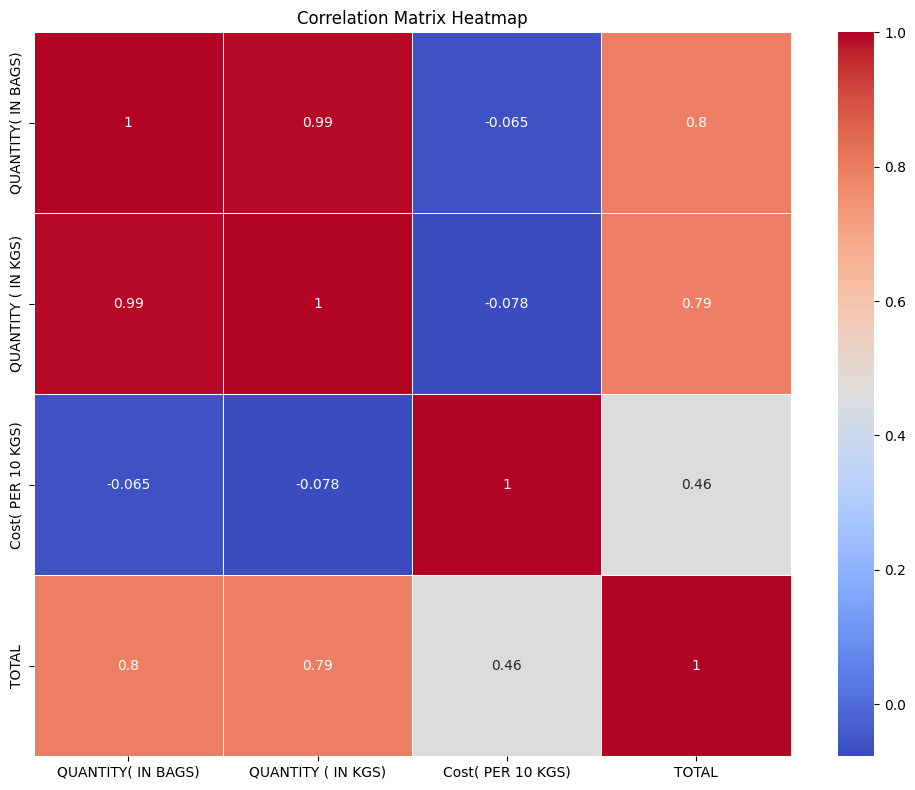

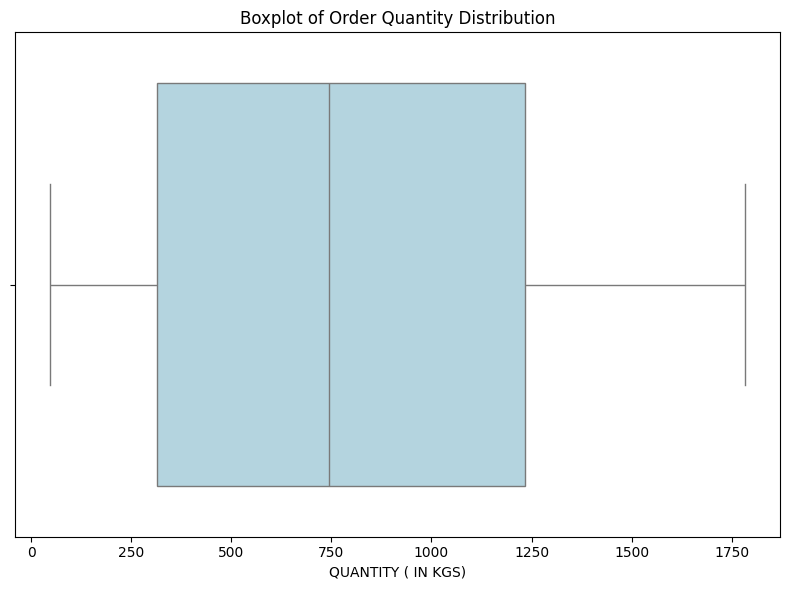

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Basic Descriptive Statistics
print("Basic Descriptive Statistics:")
print(numeric_df.describe())

# Variance of each numerical column
print("\nVariance of each numerical column:")
print(numeric_df.var())

# Skewness of each numerical column
print("\nSkewness of each numerical column:")
print(numeric_df.skew())

# Kurtosis of each numerical column
print("\nKurtosis of each numerical column:")
print(numeric_df.kurt())

# Correlation Matrix
print("\nCorrelation Matrix:")
print(numeric_df.corr())

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=numeric_df['QUANTITY ( IN KGS)'], color='lightblue')
plt.title('Boxplot of Order Quantity Distribution')
plt.tight_layout()
plt.show()


<ipython-input-36-5b95984638b3>:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Month Number'] = pd.to_datetime(df['Order date']).dt.month


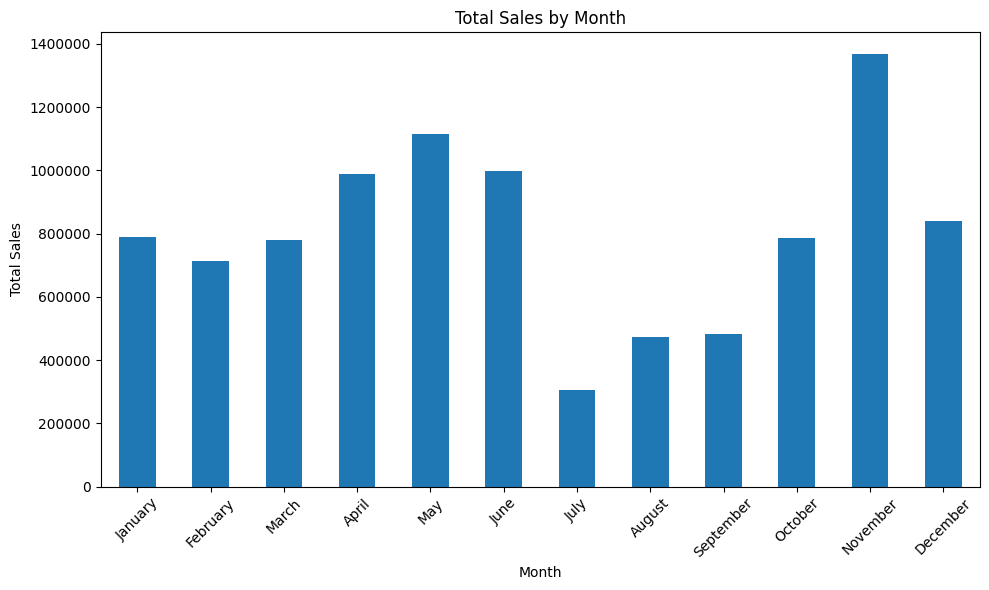

In [ ]:
import matplotlib.pyplot as plt
import calendar

# Extract month number and total from the DataFrame
df['Month Number'] = pd.to_datetime(df['Order date']).dt.month
df['Month Name'] = df['Month Number'].apply(lambda x: calendar.month_name[x])
monthly_sales = df.groupby('Month Name')['TOTAL'].sum()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

# Plotting the data
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


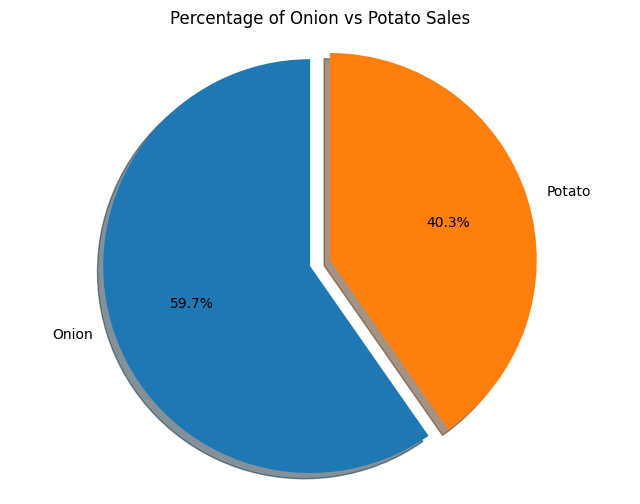

In [ ]:
# Filter data for onion and potato
onion_potato_data = df[df['Category'].isin(['ONION', 'POTATO'])]

# Calculate total sales for onion and potato
total_onion_sales = onion_potato_data[onion_potato_data['Category'] == 'ONION']['TOTAL'].sum()
total_potato_sales = onion_potato_data[onion_potato_data['Category'] == 'POTATO']['TOTAL'].sum()

# Create labels and sizes for the pie chart
labels = ['Onion', 'Potato']
sizes = [total_onion_sales, total_potato_sales]

# Create the pie chart with 3D effect
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0)  # Explode the first slice (Onion)

wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                  shadow=True, startangle=90)

ax.set_title("Percentage of Onion vs Potato Sales")

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.show()


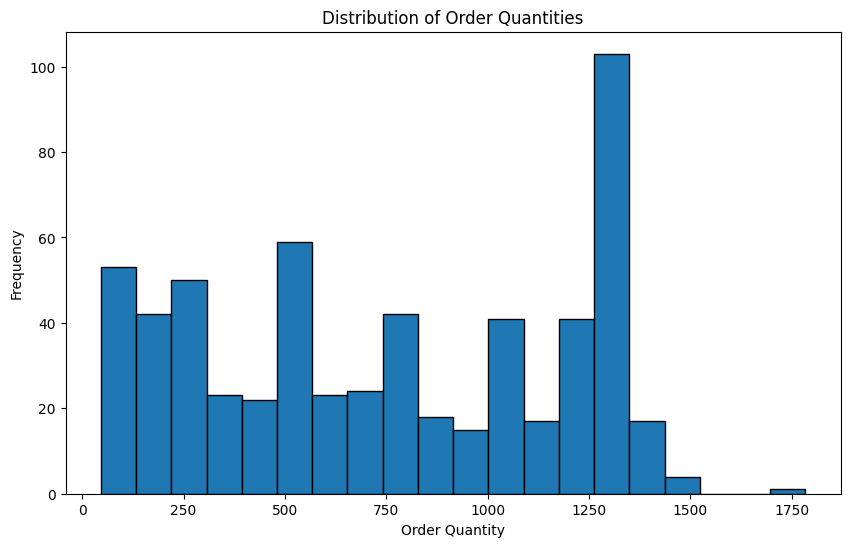

count     595.000000
mean      746.540840
std       441.110504
min        46.000000
25%       315.500000
50%       744.000000
75%      1234.500000
max      1784.000000
Name: QUANTITY ( IN KGS), dtype: float64


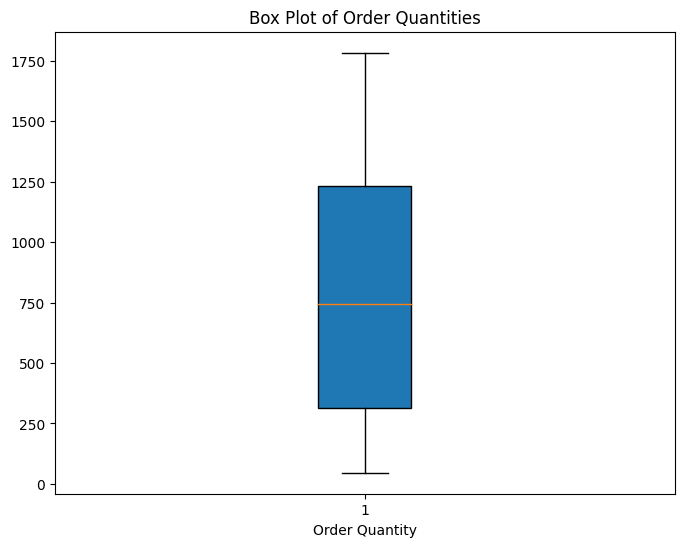

In [ ]:
# Analyze the distribution of order quantities

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['QUANTITY ( IN KGS)'], bins=20, edgecolor='black')
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print(df['QUANTITY ( IN KGS)'].describe())

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['QUANTITY ( IN KGS)'], vert=True, patch_artist=True)
plt.title('Box Plot of Order Quantities')
plt.xlabel('Order Quantity')
plt.show()


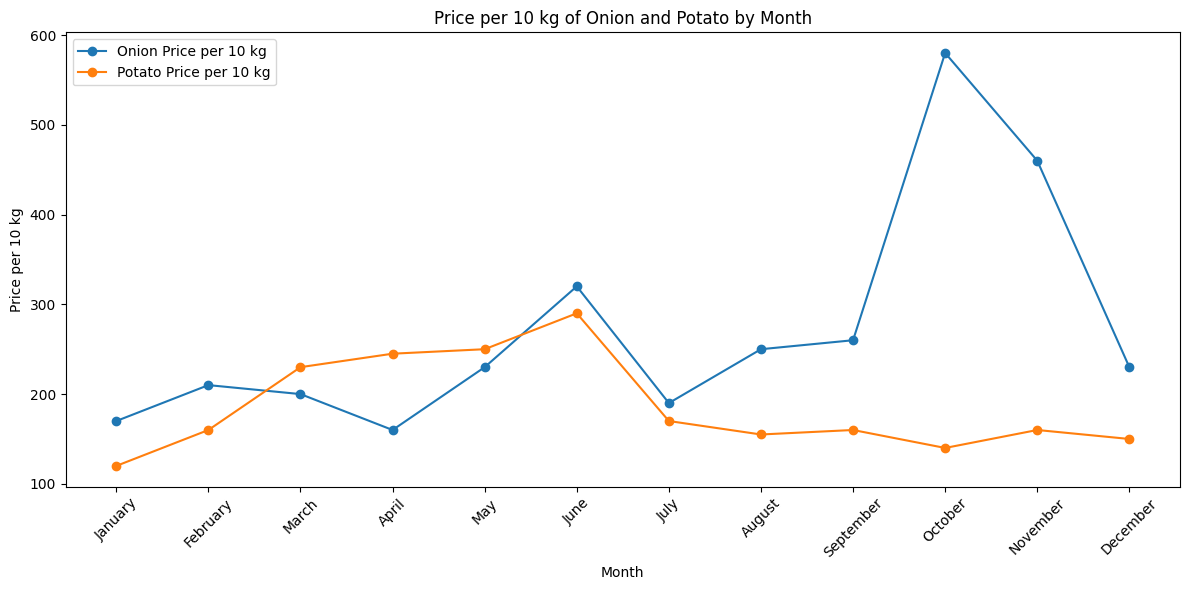

Months in the dataset: January, February, March, April, May, June, July, August, September, October, November, December


In [ ]:
# Filter data for onion and potato
onion_potato_data = df[df['Category'].isin(['ONION', 'POTATO'])]

# Calculate price per 10 kg for onion and potato for each month
onion_prices = onion_potato_data[onion_potato_data['Category'] == 'ONION'].groupby('Month Name')['Cost( PER 10 KGS)'].first()
potato_prices = onion_potato_data[onion_potato_data['Category'] == 'POTATO'].groupby('Month Name')['Cost( PER 10 KGS)'].first()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
onion_prices = onion_prices.reindex(month_order)
potato_prices = potato_prices.reindex(month_order)

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot onion prices
plt.plot(onion_prices.index, onion_prices.values, marker='o', label='Onion Price per 10 kg')

# Plot potato prices
plt.plot(potato_prices.index, potato_prices.values, marker='o', label='Potato Price per 10 kg')

plt.title('Price per 10 kg of Onion and Potato by Month')
plt.xlabel('Month')
plt.ylabel('Price per 10 kg')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display all month names
print("Months in the dataset:", ', '.join(onion_prices.index.tolist()))

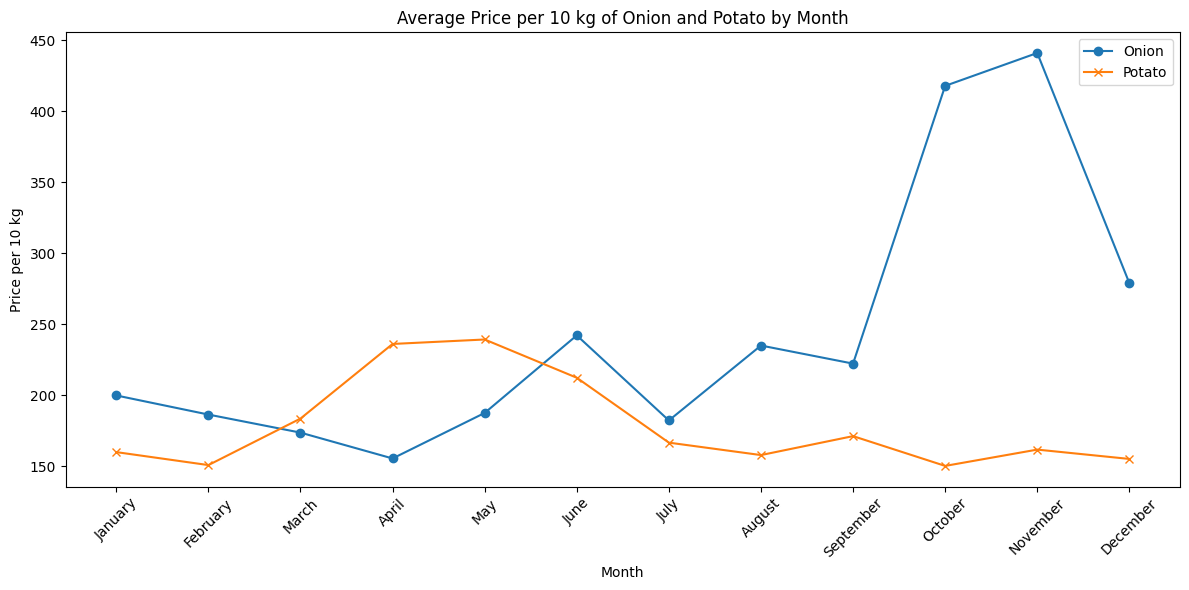

In [ ]:
# Filter data for onion and potato
onion_potato_data = df[df['Category'].isin(['ONION', 'POTATO'])]

# Calculate price per 10 kg for each month
onion_monthly_prices = onion_potato_data[onion_potato_data['Category'] == 'ONION'].groupby('Month Name')['Cost( PER 10 KGS)'].mean()
potato_monthly_prices = onion_potato_data[onion_potato_data['Category'] == 'POTATO'].groupby('Month Name')['Cost( PER 10 KGS)'].mean()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
onion_monthly_prices = onion_monthly_prices.reindex(month_order)
potato_monthly_prices = potato_monthly_prices.reindex(month_order)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(onion_monthly_prices.index, onion_monthly_prices.values, label='Onion', marker='o')
plt.plot(potato_monthly_prices.index, potato_monthly_prices.values, label='Potato', marker='x')
plt.title('Average Price per 10 kg of Onion and Potato by Month')
plt.xlabel('Month')
plt.ylabel('Price per 10 kg')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Onion PED:
    Month Name        PED
292    January  -2.033074
259    January  -1.995316
260    January   3.040622
261    January  37.441176
262    January   8.482909
..         ...        ...
369   December -65.942029
366   December  -4.704065
360   December   4.636432
377   December   9.054983
376   December  -4.034188

[315 rows x 2 columns]

Potato PED:
    Month Name        PED
265    January  57.398438
266    January   0.871233
270    January   1.807356
271    January   1.449563
272    January  -1.247637
..         ...        ...
340   December  44.078788
371   December   6.843854
373   December  -2.574713
335   December   4.902400
370   December  23.811881

[152 rows x 2 columns]

Average Onion PED: 2.967536545648998
Average Potato PED: -1.2012456783773615
The relationship between onion price and quantity demanded is not consistent with typical demand behavior.
Potatoes have elastic demand.


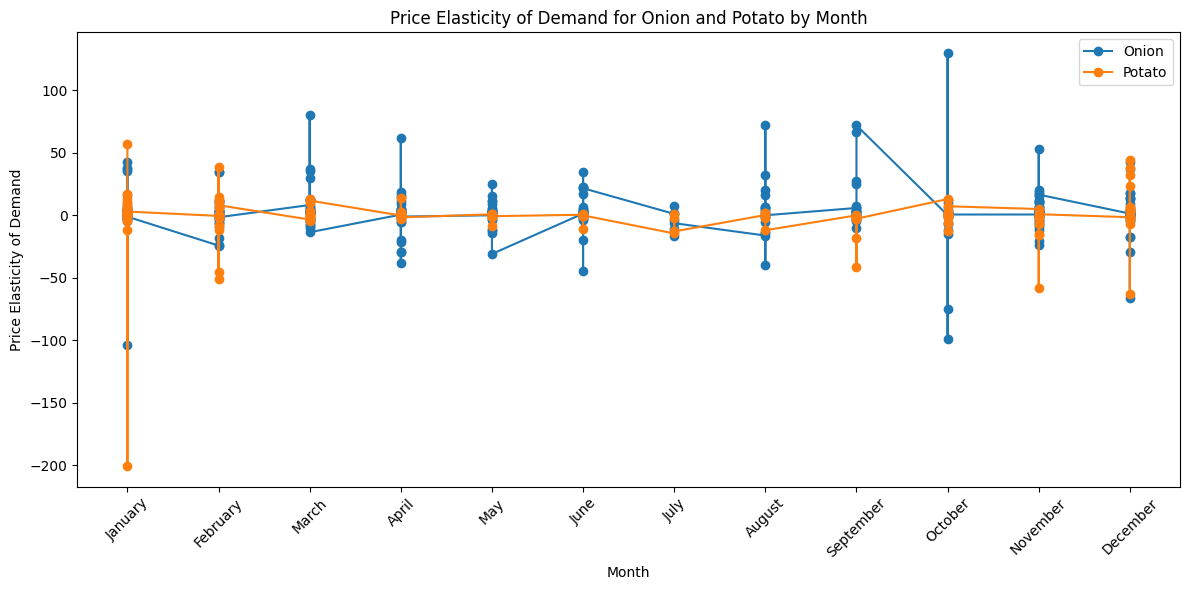

In [ ]:
# Filter data for onion and potato
onion_potato_data = df[df['Category'].isin(['ONION', 'POTATO'])]

# Calculate price and quantity changes for each month
def calculate_changes(df, category):
  data = df[df['Category'] == category].sort_values('Month Number')
  data['Price Change'] = data['Cost( PER 10 KGS)'].pct_change()
  data['Quantity Change'] = data['QUANTITY ( IN KGS)'].pct_change()
  return data

onion_changes = calculate_changes(onion_potato_data, 'ONION')
potato_changes = calculate_changes(onion_potato_data, 'POTATO')

# Calculate price elasticity of demand (PED) for each month
def calculate_ped(df):
  df['PED'] = df['Quantity Change'] / df['Price Change']
  return df

onion_ped = calculate_ped(onion_changes)
potato_ped = calculate_ped(potato_changes)

# Handle potential NaN values in PED
# Replace infinite values with NaN for consistency
onion_ped.replace([np.inf, -np.inf], np.nan, inplace=True)
potato_ped.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in PED
onion_ped.dropna(subset=['PED'], inplace=True)
potato_ped.dropna(subset=['PED'], inplace=True)

# Print PED values
print("Onion PED:")
print(onion_ped[['Month Name', 'PED']])

print("\nPotato PED:")
print(potato_ped[['Month Name', 'PED']])

# Analyze and interpret the results
# Calculate average PED
avg_onion_ped = onion_ped['PED'].mean()
avg_potato_ped = potato_ped['PED'].mean()

print("\nAverage Onion PED:", avg_onion_ped)
print("Average Potato PED:", avg_potato_ped)

# Interpret the results
if avg_onion_ped < -1:
  print("Onions have elastic demand, meaning a price increase leads to a proportionally larger decrease in quantity demanded.")
elif -1 < avg_onion_ped < 0:
  print("Onions have inelastic demand, meaning a price increase leads to a proportionally smaller decrease in quantity demanded.")
elif avg_onion_ped == -1:
  print("Onions have unit elastic demand, meaning a price change leads to an equal proportional change in quantity demanded.")
else:
  print("The relationship between onion price and quantity demanded is not consistent with typical demand behavior.")

# Repeat the interpretation for potatoes
if avg_potato_ped < -1:
  print("Potatoes have elastic demand.")
elif -1 < avg_potato_ped < 0:
  print("Potatoes have inelastic demand.")
elif avg_potato_ped == -1:
  print("Potatoes have unit elastic demand.")
else:
  print("The relationship between potato price and quantity demanded is not consistent with typical demand behavior.")

# Further analysis and visualization
# Plot PED over time
plt.figure(figsize=(12, 6))
plt.plot(onion_ped['Month Name'], onion_ped['PED'], label='Onion', marker='o')
plt.plot(potato_ped['Month Name'], potato_ped['PED'], label='Potato', marker='o')
plt.title('Price Elasticity of Demand for Onion and Potato by Month')
plt.xlabel('Month')
plt.ylabel('Price Elasticity of Demand')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

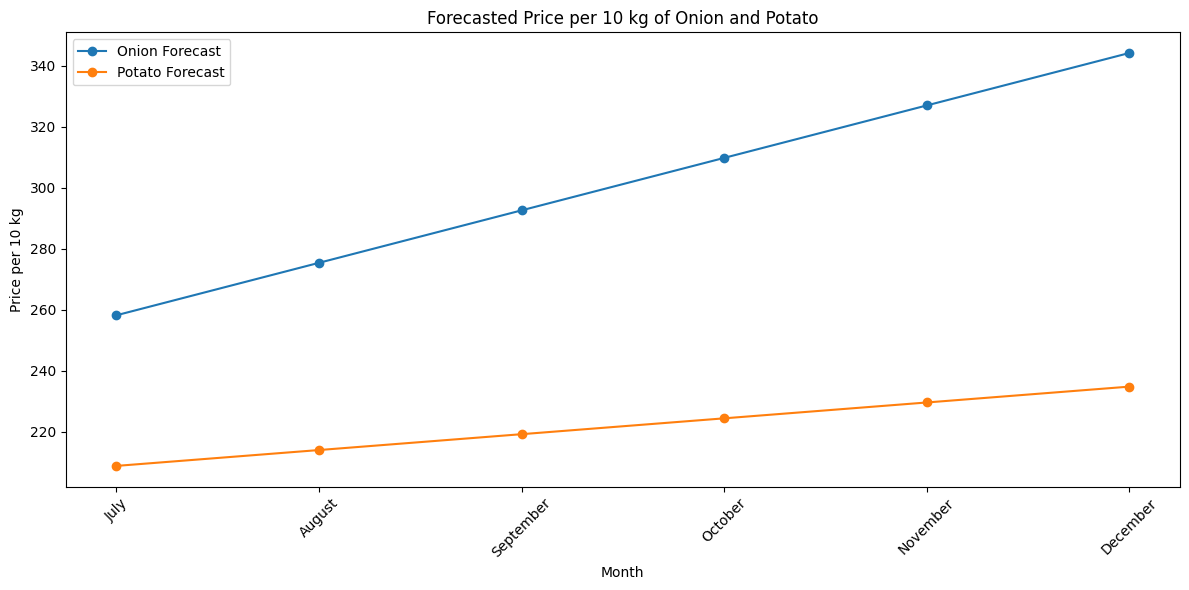

  Month Name  Onion Forecast  Potato Forecast
0       July      258.130982       208.749676
1     August      275.332359       213.948670
2  September      292.533736       219.147663
3    October      309.735113       224.346657
4   November      326.936490       229.545651
5   December      344.137867       234.744645


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data for forecasting
# We'll use data up to June for training
train_data = onion_potato_data[onion_potato_data['Month Number'] < 7]
test_data = onion_potato_data[onion_potato_data['Month Number'] >= 7]

# Separate onion and potato data
onion_train = train_data[train_data['Category'] == 'ONION']
potato_train = train_data[train_data['Category'] == 'POTATO']

# Create and fit linear regression models
onion_model = LinearRegression()
onion_model.fit(onion_train['Month Number'].values.reshape(-1, 1), onion_train['Cost( PER 10 KGS)'])

potato_model = LinearRegression()
potato_model.fit(potato_train['Month Number'].values.reshape(-1, 1), potato_train['Cost( PER 10 KGS)'])

# Forecast prices for the remaining months (July to December)
future_months = np.arange(7, 13).reshape(-1, 1)
onion_forecast = onion_model.predict(future_months)
potato_forecast = potato_model.predict(future_months)

# Create a DataFrame for forecasted prices
forecast_df = pd.DataFrame({
    'Month Number': future_months.flatten(),
    'Onion Forecast': potato_forecast,
    'Potato Forecast': onion_forecast
})

# Map month numbers to month names
forecast_df['Month Name'] = forecast_df['Month Number'].apply(lambda x: calendar.month_name[x])

# Plotting the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Month Name'], forecast_df['Onion Forecast'], label='Onion Forecast', marker='o')
plt.plot(forecast_df['Month Name'], forecast_df['Potato Forecast'], label='Potato Forecast', marker='o')
plt.title('Forecasted Price per 10 kg of Onion and Potato')
plt.xlabel('Month')
plt.ylabel('Price per 10 kg')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display the forecasted prices
print(forecast_df[['Month Name', 'Onion Forecast', 'Potato Forecast']])


                    QUANTITY ( IN KGS)  Cost( PER 10 KGS)     TOTAL
QUANTITY ( IN KGS)            1.000000          -0.077902  0.794251
Cost( PER 10 KGS)            -0.077902           1.000000  0.454691
TOTAL                         0.794251           0.454691  1.000000


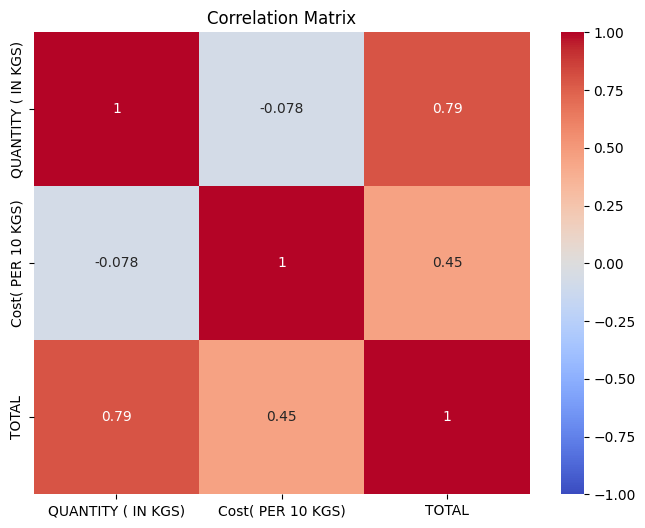

There is a negative correlation between order quantity and price per 10 kg.


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['QUANTITY ( IN KGS)', 'Cost( PER 10 KGS)', 'TOTAL']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Interpret the correlations
if correlation_matrix.loc['QUANTITY ( IN KGS)', 'Cost( PER 10 KGS)'] < 0:
  print("There is a negative correlation between order quantity and price per 10 kg.")
elif correlation_matrix.loc['QUANTITY ( IN KGS)', 'Cost( PER 10 KGS)'] > 0:
  print("There is a positive correlation between order quantity and price per 10 kg.")
else:
  print("There is no significant correlation between order quantity and price per 10 kg.")

<ipython-input-94-ba8edb848567>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Day of Month'] = pd.to_datetime(df['Order date']).dt.day


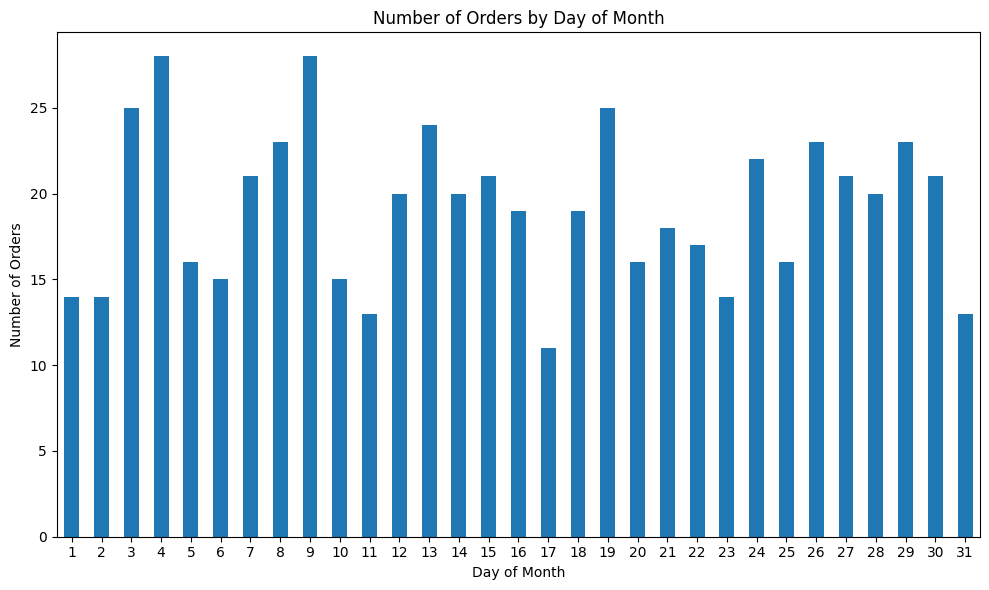

In [ ]:
# Extract day of the month from 'Order date'
df['Day of Month'] = pd.to_datetime(df['Order date']).dt.day

# Group by 'Day of Month' and count orders
daily_orders = df.groupby('Day of Month')['Order date'].count()

# Plot the daily order distribution
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='bar')
plt.title('Number of Orders by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-18-c6450ab736ae>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Month Name'] = pd.to_datetime(df['Order date']).dt.month_name()


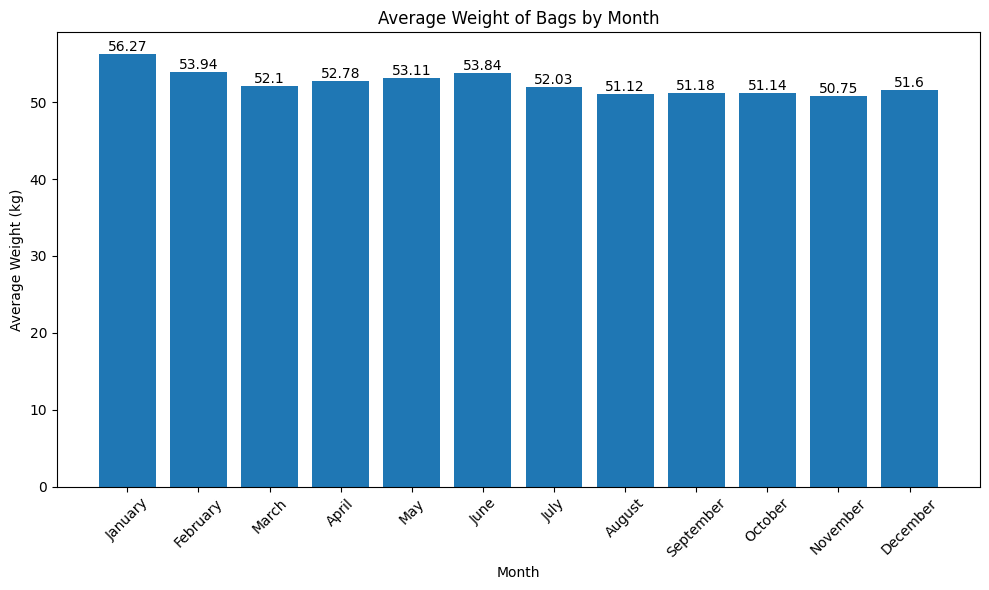

In [ ]:
# Extract month name and calculate average weight
df['Month Name'] = pd.to_datetime(df['Order date']).dt.month_name()
df['Avg Weight'] = df['QUANTITY ( IN KGS)'] / df['QUANTITY( IN BAGS)']
monthly_avg_weight = df.groupby('Month Name')['Avg Weight'].mean()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_weight = monthly_avg_weight.reindex(month_order)

# Plot the monthly average weight
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_avg_weight.index, monthly_avg_weight.values)
plt.title('Average Weight of Bags by Month')
plt.xlabel('Month')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the numbers on top of the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


In [ ]:
# Generate descriptive statistics for the entire dataset
descriptive_stats = df.describe(include='all')
print(descriptive_stats)

# Split the dataset and generate descriptive statistics for each column
for column in df.columns:
  column_data = df[column]
  column_stats = column_data.describe()
  print(f"\nDescriptive statistics for column '{column}':")
  print(column_stats)


        Order date Category  QUANTITY( IN BAGS)  QUANTITY ( IN KGS)  \
count          594      594          594.000000          594.000000   
unique         259        2                 NaN                 NaN   
top     07/03/2024    ONION                 NaN                 NaN   
freq             7      373                 NaN                 NaN   
mean           NaN      NaN           14.260943          745.593939   
std            NaN      NaN            8.527760          440.876641   
min            NaN      NaN            1.000000           46.000000   
25%            NaN      NaN            6.000000          315.250000   
50%            NaN      NaN           14.500000          743.500000   
75%            NaN      NaN           25.000000         1233.500000   
max            NaN      NaN           35.000000         1784.000000   

        Cost( PER 10 KGS)         TOTAL  
count          594.000000    594.000000  
unique                NaN           NaN  
top                  